## Preprocessing & Explorative Data Analysis (EDA)

In [ ]:
!pip install data-gradients --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.2/459.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.3/108.3 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.2/433.2 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import data_gradients
import torchvision

That all the team members & others have access to the dataset, we hosted it on Github (LFS)

In [ ]:
# load data set & unzip

!wget https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip

--2024-01-09 19:16:34--  https://github.com/felixn95/tds_project/raw/main/wisdatathon2019.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/felixn95/tds_project/main/wisdatathon2019.zip [following]
--2024-01-09 19:16:35--  https://media.githubusercontent.com/media/felixn95/tds_project/main/wisdatathon2019.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 483449080 (461M) [application/zip]
Saving to: ‘wisdatathon2019.zip’

wisdatathon2019.zip 100%[===================>] 461.05M   253MB/s    in 1.8s    

2024-01-09 19:16:47 (253 MB/s) - ‘wisdatathon2019.zip’ saved [483449080/483

In [ ]:
!unzip wisdatathon2019.zip

Archive:  wisdatathon2019.zip
  inflating: wisdatathon2019/holdout.csv  
 extracting: wisdatathon2019/leaderboard_holdout_data.zip  
 extracting: wisdatathon2019/leaderboard_test_data.zip  
  inflating: wisdatathon2019/SampleSubmission.csv  
  inflating: wisdatathon2019/solutionFile.csv  
  inflating: wisdatathon2019/testlabels.csv  
 extracting: wisdatathon2019/train_images.zip  
  inflating: wisdatathon2019/traininglabels.csv  


In [ ]:
!unzip wisdatathon2019/train_images.zip
!unzip wisdatathon2019/leaderboard_test_data.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: leaderboard_test_data/img_04013.jpg  
  inflating: leaderboard_test_data/img_04014.jpg  
  inflating: leaderboard_test_data/img_04015.jpg  
  inflating: leaderboard_test_data/img_04016.jpg  
  inflating: leaderboard_test_data/img_04017.jpg  
  inflating: leaderboard_test_data/img_04018.jpg  
  inflating: leaderboard_test_data/img_04019.jpg  
  inflating: leaderboard_test_data/img_04020.jpg  
  inflating: leaderboard_test_data/img_04021.jpg  
  inflating: leaderboard_test_data/img_04022.jpg  
  inflating: leaderboard_test_data/img_04023.jpg  
  inflating: leaderboard_test_data/img_04024.jpg  
  inflating: leaderboard_test_data/img_04025.jpg  
  inflating: leaderboard_test_data/img_04026.jpg  
  inflating: leaderboard_test_data/img_04027.jpg  
  inflating: leaderboard_test_data/img_04028.jpg  
  inflating: leaderboard_test_data/img_04029.jpg  
  inflating: leaderboard_test_data/img_04030.jpg  
  inflating: le

Let's define some paths.

In [ ]:
train_images = '/content/train_images'
test_images =  '/content/leaderboard_test_data'
train_labels = '/content/wisdatathon2019/traininglabels.csv'
test_labels = '/content/wisdatathon2019/testlabels.csv'

The labeled images in the labels csv's do not fit to the image ids, because we need to remove the year at the end of the string in each row.

In [ ]:
import pandas as pd

def adjust_image_ids(input_csv_path, output_csv_path):
    """
    Adjusts the image_ids in the input CSV file by removing the year digits before '.jpg'
    and saves the modified DataFrame to the output CSV path.
    """

    df = pd.read_csv(input_csv_path)

    # Modify the 'image_id' column
    df['image_id'] = df['image_id'].str.replace(r'\d{4}\.jpg', '.jpg', regex=True)

    # Save to the output CSV file
    df.to_csv(output_csv_path, index=False)


adjust_image_ids(train_labels, 'traininglabels_processed.csv')
adjust_image_ids(test_labels, 'testlabels_processed.csv')

train_labels = '/content/traininglabels_processed.csv'
test_labels = '/content/testlabels_processed.csv'

There are some image_ids listed in the labels csv, but not existing in the image folder -> to avoid errors we will filter the labels csv

In [ ]:
import os

def filter_missing_images(csv_file, image_dir, target_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Filter out rows where the image file does not exist
    df_filtered = df[df['image_id'].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))]

    # Save the filtered DataFrame
    df_filtered.to_csv(target_file, index=False)

filter_missing_images(train_labels, train_images, '/content/train_labels_filtered.csv')
filter_missing_images(test_labels, test_images, '/content/test_labels_filtered.csv')

train_labels = '/content/train_labels_filtered.csv'
test_labels = '/content/test_labels_filtered.csv'



Now the data is prepared to use the Data Gradients Library to get some insights and to explore the data: https://docs.deci.ai/data-gradients/index.html

  - Executing analysis with: 
  - batches_early_stop: None 
  - len(train_data): 236 
  - len(val_data): 56 
  - log directory: /content/logs/Oil_Palm_Plantation_Classification_Analysis 
  - Archive directory: /content/logs/Oil_Palm_Plantation_Classification_Analysis/archive_20240109-192154 
  - feature extractor list: {'Image Features': [ClassificationSummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Classification Features': [ClassificationClassFrequency, ClassificationClassDistributionVsArea]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║
╚══════════════════════════════════════════════════════════════════════════╝


Analyzing... :   0%|          | 0/236 [00:00<?, ?it/s]


--------------------------------------------------------------------------------
In which format are your images loaded ?
--------------------------------------------------------------------------------

Options:
[0] | RGB
[1] | BGR
[2] | LAB
[3] | Other

Your selection (Enter the corresponding number) >>> 0
Great! You chose: `RGB`


Analyzing... : 15057it [02:17, 109.83it/s]
Summarizing... : 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`ClassificationDataConfig` cache is not enabled because `cache_path=None` was not set.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /content/logs/Oil_Palm_Plantation_Classification_Analysis
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /content/logs/Oil_Palm_Plantation_Classification_Analysis/archive_20240109-192154
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/data-gradients !


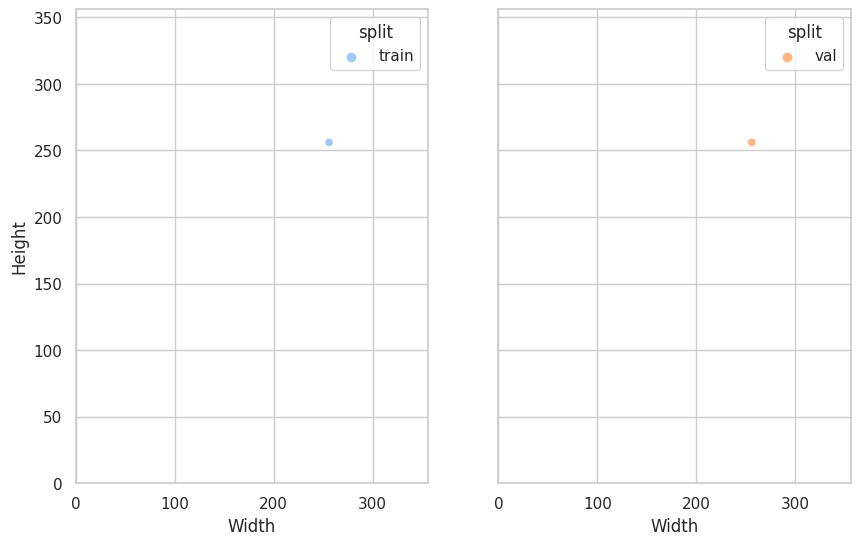

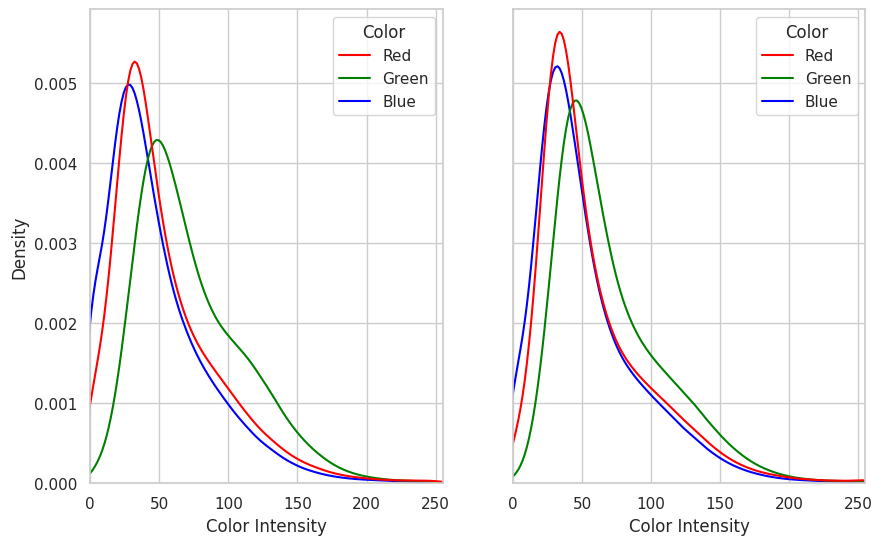

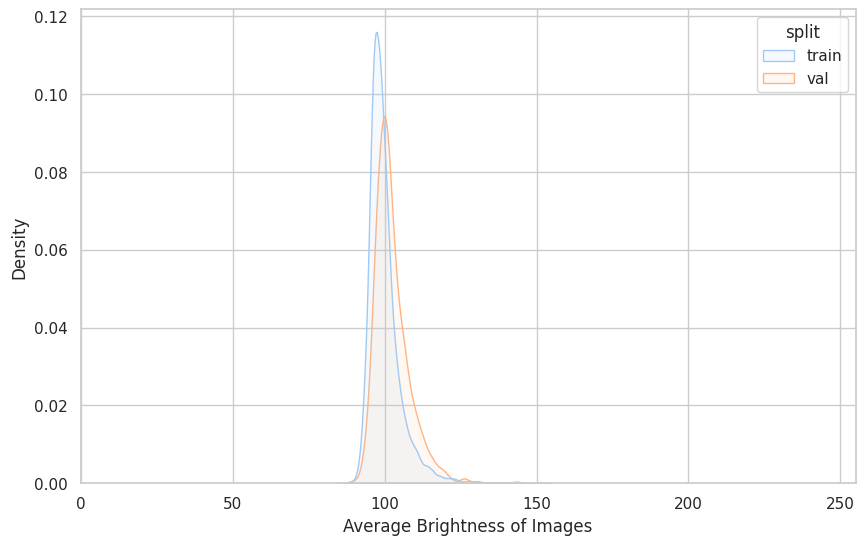

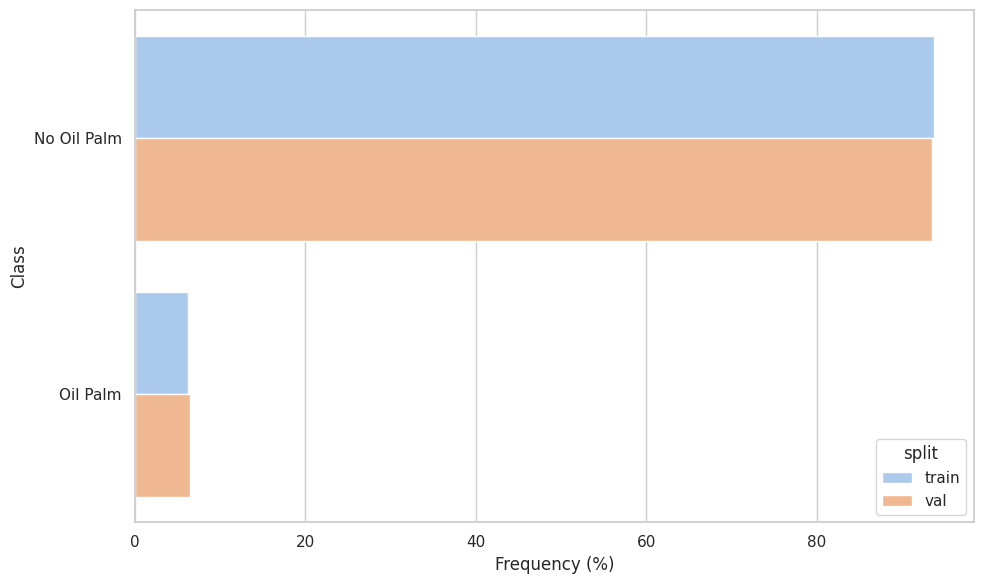

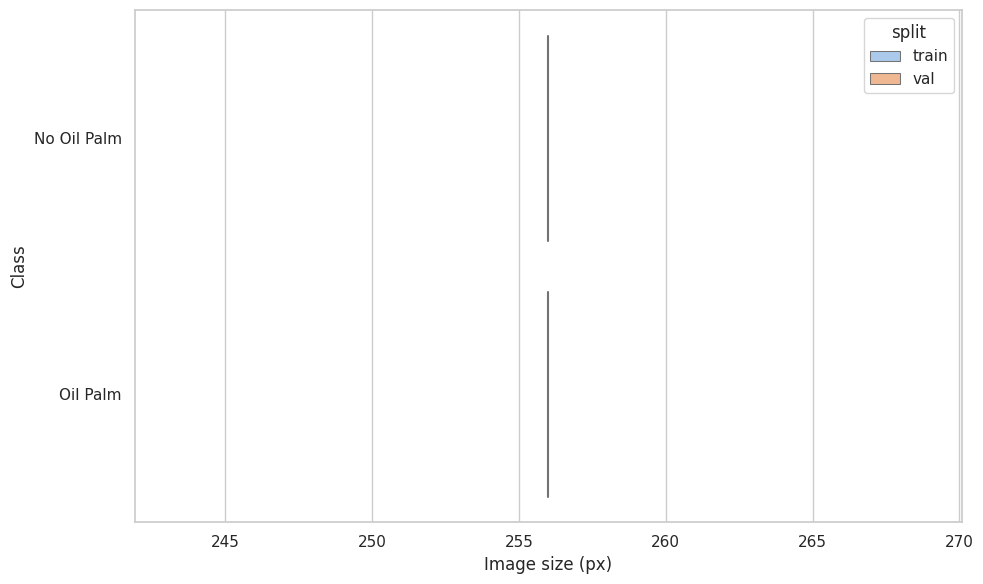

In [ ]:
from data_gradients.managers.classification_manager import ClassificationAnalysisManager
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# create a specific class to use it in the Dataloader

class OilPalmDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.labels = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.labels.iloc[idx, 0])
        image = Image.open(img_name)
        label = self.labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to a fixed size for uniformity
    transforms.ToTensor()
])

# Create the datasets
train_dataset = OilPalmDataset(csv_file=train_labels,
                               root_dir=train_images,
                               transform=transform)

val_dataset = OilPalmDataset(csv_file=test_labels,
                             root_dir=test_images,
                             transform=transform)

# Create the dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Class names
class_names = ['No Oil Palm', 'Oil Palm']

# Use the Data-Gradients ClassificationAnalysisManager
from data_gradients.managers.classification_manager import ClassificationAnalysisManager

analyzer = ClassificationAnalysisManager(
    report_title="Oil Palm Plantation Classification Analysis",
    train_data=train_loader,
    val_data=val_loader,
    class_names=class_names,
)

analyzer.run()


As to see in the Data Gradients Report, the train & test set is balanced and all images are of size 256. Further, on both sets there are approx. 10% images labeled with "has_oilpalm".

Each image is also labeled with a "score", which represents the confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result.

We can now have a look how many scores are below 75% confidence, maybe this could be useful later.

In [ ]:
df_train_labels = pd.read_csv(train_labels)
df_train_labels[df_train_labels['score']<0.75]

,image_id,has_oilpalm,score
34,img_00047.jpg,0,0.6691
72,img_00109.jpg,1,0.3944
76,img_00114.jpg,0,0.5531
116,img_00179.jpg,0,0.6038
175,img_00271.jpg,0,0.6263
...,...,...,...
15021,img_10943.jpg,0,0.4052
15027,img_10951.jpg,0,0.6027
15028,img_10953.jpg,0,0.6033
15029,img_10954.jpg,0,0.5948


# Training & Monitoring
For training we will use FastAI in combination with a monitoring tool called neptune-ai (https://docs.neptune.ai/) for model tracking and evaluation.

In [ ]:
! pip install -U neptune neptune-fastai fastai torch torchvision numpy --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.5/481.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 791.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 946.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import neptune
import torch
from fastai.callback.all import SaveModelCallback
from fastai.vision.all import *
from neptune.integrations.fastai import NeptuneCallback
from neptune.types import File

In [ ]:
# initialize neptune ai
run = neptune.init_run(project='tds-ws23/tds23', api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZjExOTA0Yy0zZjhhLTQ3Y2MtYjYzNy1kY2Q1OGMwODAyYWUifQ==",
                   tags="notebook-run_1")


https://app.neptune.ai/tds-ws23/tds23/e/TDS-2


In [ ]:
def get_x(row):
    return os.path.join(train_images, row['image_id'])

def get_y(row):
    return row['has_oilpalm']

# create data block

palm_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)


In [ ]:
dls = palm_data_block.dataloaders(pd.read_csv(train_labels), bs=64)

In [ ]:
# Available pretrained models from fast.ai
model_set = {
    "resnet18", "resnet34", "resnet50", "resnet101", "resnet152",
    "squeezenet1_0", "squeezenet1_1",
    "densenet121", "densenet169", "densenet201", "densenet161",
    "vgg16_bn", "vgg19_bn",
    "alexnet"
}


In [ ]:
# create learner and add neptune for tracking the runs

pickled_learner = "learner.pkl"
base_namespace = "experiment_resnet50"
neptune_cbk = NeptuneCallback(run=run, base_namespace=base_namespace)

learn = cnn_learner(dls, resnet50, cbs=[neptune_cbk], metrics=accuracy)
learn.fit_one_cycle(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 153MB/s]
/usr/local/lib/python3.10/dist-packages/neptune_fastai/impl/__init__.py:247: UserWarning: NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.
  warnings.warn("NeptuneCallback: SaveModelCallback is necessary for uploading model checkpoints.")


epoch,train_loss,valid_loss,accuracy,time
0,0.697322,0.318396,0.881767,02:06
1,0.290592,0.257583,0.931916,02:04
2,0.226755,0.215785,0.930920,02:04
3,0.217823,0.215615,0.930256,02:05


In [ ]:
# export the model to download it and reuse it locally / anywhere
learn.remove_cb(neptune_cbk)  # remove NeptuneCallback
learn.export(f"./{pickled_learner}")  # export learner
run[f"{base_namespace}/pickled_learner"].upload(pickled_learner)


# Interpretation

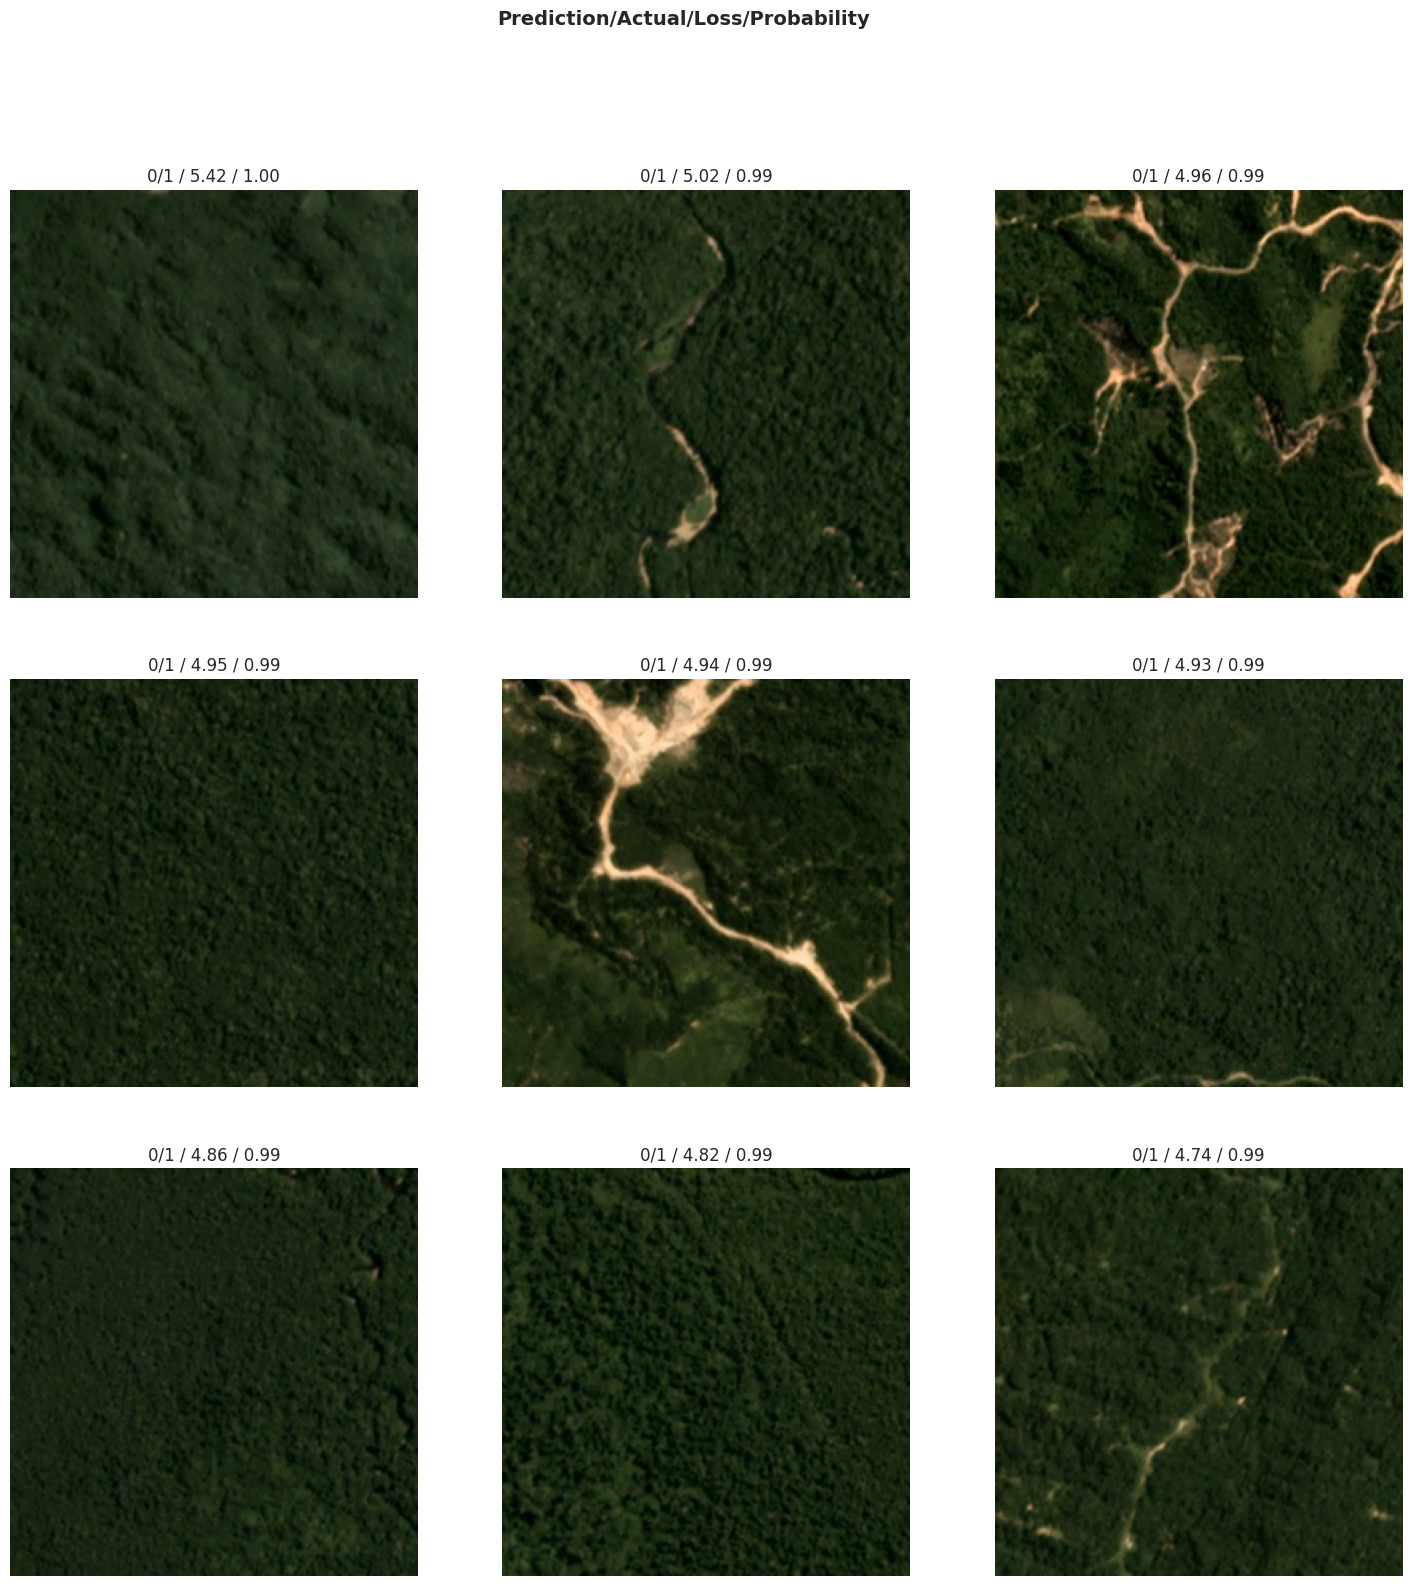

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, largest=True, figsize=(18,18))